In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df=pd.read_csv('heart (2).csv')

In [3]:
df1=df.copy()

In [4]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
x=df1.drop('target',axis=1)

In [7]:
y=df1['target']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
models={'logistic':LogisticRegression(),'decision tree':DecisionTreeClassifier(),'random forest':RandomForestClassifier()}
a={'logistic':[],'decision tree':[],'random forest':[]}
for i in models:
    model=models[i]
    scores=cross_val_score(model,x,y,cv=5)
    a[i].append(scores.mean())
    print(i,scores.mean())

C:\Users\aftha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aftha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

logistic 0.8216393442622951
decision tree 0.7621311475409837
random forest 0.8248633879781421


In [11]:
Keymax = max(zip(a.values(), a.keys()))[1]
print('use',Keymax)

use random forest


In [12]:
Randf=RandomForestClassifier()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=1)

In [15]:
Randf.fit(xtrain,ytrain)

RandomForestClassifier()

In [16]:
Randf.score(xtest,ytest)

0.7704918032786885

In [17]:
y_act=ytest
y_pred=Randf.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

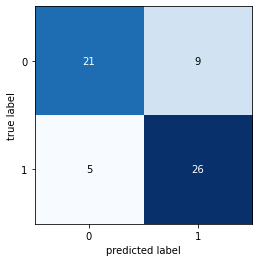

In [18]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [20]:
Randf.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

C:\Users\aftha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)